In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function
from enlib import enmap
import numpy as np
from orphics import maps,io,stats,cosmology,lensing

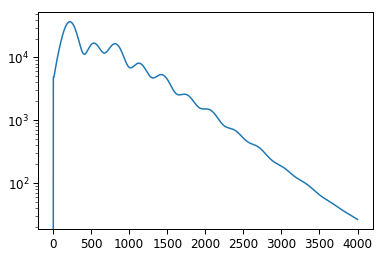

In [4]:
theory = cosmology.default_theory()
lmax = 4000
ells = np.arange(0,lmax,1)
cltt = theory.lCl('TT',ells)

pl = io.Plotter(yscale='log')
pl.add(ells,cltt*ells**2.)
pl.done()

In [10]:
deg = 10.0
px_arcmin = 1.0
shape,wcs = maps.rect_geometry(width_deg=deg,px_res_arcmin=px_arcmin)
mgen = maps.MapGen(shape,wcs,cltt.reshape((1,1,cltt.size)))

imap = mgen.get_map()

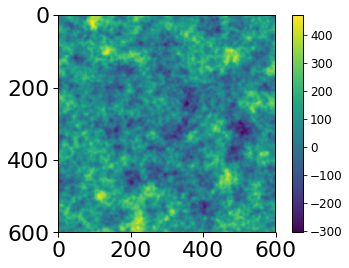

In [11]:
io.plot_img(imap)

In [13]:
fc = maps.FourierCalc(shape,wcs)
p2d,kmap,_ = fc.power2d(imap)

In [15]:
print(imap.shape,imap.dtype,imap.wcs)
print(kmap.shape,kmap.dtype)
print(p2d.shape,p2d.dtype)

(600, 600) float64 car:{cdelt:[0.01667,0.01667],crval:[0,0],crpix:[300.5,300.5]}
(600, 600) complex128
(600, 600) float64


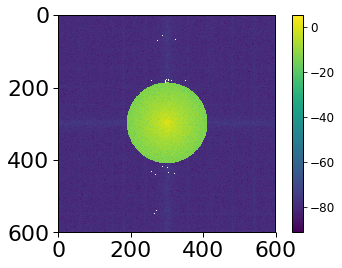

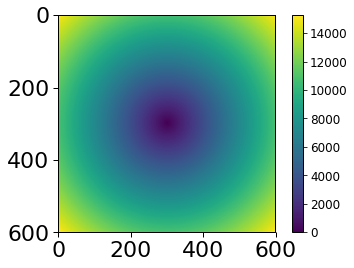

In [21]:
io.plot_img(np.fft.fftshift(np.log(p2d)))


io.plot_img(np.fft.fftshift(imap.modlmap()))

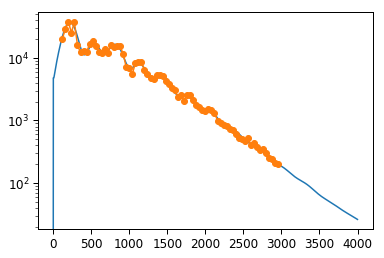

In [27]:
bin_edges = np.arange(100,3000,40)
binner = stats.bin2D(imap.modlmap(),bin_edges)
cents, p1d = binner.bin(p2d)

pl = io.Plotter(yscale='log')
pl.add(ells,cltt*ells**2.)
pl.add(cents,p1d*cents**2.,marker="o")
pl.done()

In [29]:
params = cosmology.defaultCosmology
params['mnu'] = 0.100
cc = cosmology.Cosmology(params,lmax=2000)

Generating theory Cls...


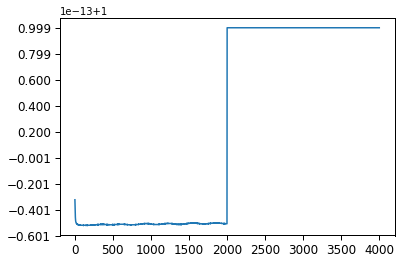

In [30]:
diff = (cltt-cc.theory.lCl('TT',ells))/cltt

pl = io.Plotter()
pl.add(ells,diff)
pl.done()